# **Task 11 of Buildables Data Science Fellowship**

## In this task, I have been assigned to train two models:
1. Logistic Regression
2. Decision Tree Classifier

## I have to train the models on diabetes dataset, which in the end will predict if a person has diabetes or not.

### **Importing Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    precision_score,
    recall_score,
    roc_auc_score, 
    accuracy_score,
    confusion_matrix
)

### **Importing CSV Data and converting into Data Frame.**

In [15]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### **Checking the data for inconsistencies**

In [16]:
cols = df.columns
for col in cols:
    print(col, ': ',df[col].isna().sum())
print(f'\n\nShape of the Dataset: ', df.shape)

Pregnancies :  0
Glucose :  0
BloodPressure :  0
SkinThickness :  0
Insulin :  0
BMI :  0
DiabetesPedigreeFunction :  0
Age :  0
Outcome :  0


Shape of the Dataset:  (768, 9)


In [17]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [18]:
x = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df['Outcome']

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
reg_model = LogisticRegression()
reg_model.fit(xTrain, yTrain)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [20]:
y_pred = reg_model.predict(xTest)

<Axes: >

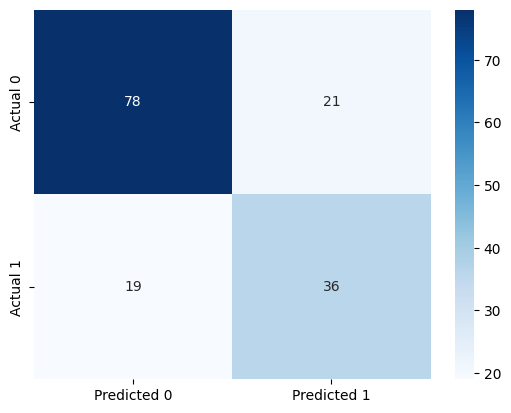

In [31]:
cm = confusion_matrix(yTest, y_pred)
sbn.heatmap(cm, cmap='Blues', fmt='d', annot=True,
    xticklabels=['Predicted 0', 'Predicted 1'],
    yticklabels=['Actual 0', 'Actual 1'])

#### Now, calculating the accuracy, precision, recall, and roc_auc score for linear regression model by converting its predictions into classification labels

In [32]:
accuracy = accuracy_score(yTest, y_pred)
precision = precision_score(yTest, y_pred)
recall = recall_score(yTest, y_pred)
roc_auc = roc_auc_score(yTest, y_pred)

print(f'Accuracy:{accuracy}\nPrecision: {precision}\nRecall: {recall}\nROC_AUC: {roc_auc}')

Accuracy:0.7402597402597403
Precision: 0.631578947368421
Recall: 0.6545454545454545
ROC_AUC: 0.7212121212121212


# **Let's train Decision Tree Model on the same dataset.**

In [33]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(xTrain, yTrain)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [34]:

y_pred_dtc = dtc.predict(xTest)

In [35]:
accuracy1 = accuracy_score(yTest, y_pred_dtc)
precision1 = precision_score(yTest, y_pred_dtc)
recall1 = recall_score(yTest, y_pred_dtc)
roc_auc1 = roc_auc_score(yTest, y_pred_dtc)

print(f'Accuracy:{accuracy1}\nPrecision: {precision1}\nRecall: {recall1}\nROC_AUC: {roc_auc1}')

Accuracy:0.7467532467532467
Precision: 0.625
Recall: 0.7272727272727273
ROC_AUC: 0.7424242424242424


<Axes: >

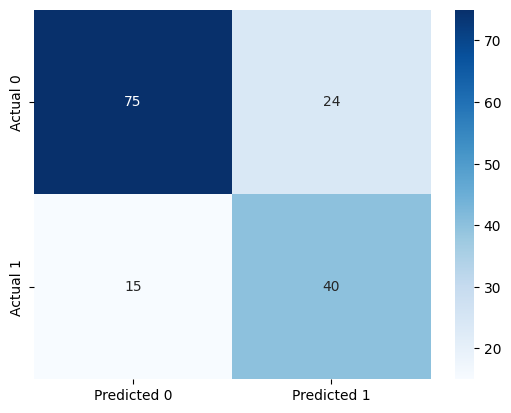

In [43]:
cm = confusion_matrix(yTest, y_pred_dtc)
sbn.heatmap(cm, annot=True, cmap="Blues",
    xticklabels=['Predicted 0', 'Predicted 1'],
    yticklabels=['Actual 0', 'Actual 1'])